In [1]:
import pandas as pd

df = pd.read_pickle('df_mod_3.pkl')

In [2]:
X = df[['term', 'grade', 'home_ownership', 'verification_status',
       'purpose', 'application_type', 'loan_amnt', 'int_rate',
       'annual_inc', 'dti', 'Emp_Length_Years', 'Earliest_Cr_Line_Yr']]

y = df['Default']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [7]:
X_train.shape

(2400, 12)

In [10]:
X_train[:5]

,term,grade,home_ownership,verification_status,purpose,application_type,loan_amnt,int_rate,annual_inc,dti,Emp_Length_Years,Earliest_Cr_Line_Yr
162874,0,3,3,0,1,0,6000.0,17.77,40000.0,5.61,2.0,2008
212008,0,0,2,2,11,0,9600.0,7.62,60000.0,18.00,1.0,2001
418866,1,3,0,0,2,0,29900.0,17.57,65000.0,21.31,10.0,1999
749680,1,4,3,1,2,0,17250.0,18.25,39221.0,27.66,8.0,2001
46092,0,2,0,2,4,0,7500.0,13.98,60000.0,2.12,10.0,1997


In [4]:
import numpy as np
import pandas as pd
import lightgbm as lgb

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [5]:
X_train.columns.values

array(['term', 'grade', 'home_ownership', 'verification_status',
       'purpose', 'application_type', 'loan_amnt', 'int_rate',
       'annual_inc', 'dti', 'Emp_Length_Years', 'Earliest_Cr_Line_Yr'],
      dtype=object)

In [6]:
mod3 = lgb.LGBMClassifier(random_state = 123)

In [9]:
param_grid3 = {'max_depth': [15, 20, 25, 30],
               'num_leaves': [10, 20, 30],
              'learning_rate': [0.01, 0.1, 0.5],
              'n_estimator': [100, 200,300,400,500]}

In [11]:
grid3 = GridSearchCV(estimator = mod3,
                    param_grid = param_grid3,
                    #categorical_feature = [0,1,2,3,4,5],
                    scoring = 'roc_auc',
                    cv = 3,
                    n_jobs = -1,
                    verbose = 1)

In [12]:
grid3.fit(X_train, y_train,
         categorical_feature = [0,1,2,3,4,5])

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   57.8s finished
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is [0, 1, 2, 3, 4, 5]
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))


GridSearchCV(cv=3, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=123,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [15, 20, 25, 30], 'num_leaves': [10, 20, 30], 'learning_rate': [0.01, 0.1, 0.5], 'n_estimator': [100, 200, 300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [13]:
classifier3 = lgb.LGBMClassifier(random_state = 123,
                                max_depth = grid3.best_params_['max_depth'],
                                 num_leaves = grid3.best_params_['num_leaves'],
                                learning_rate = grid3.best_params_['learning_rate'],
                                n_estimator = grid3.best_params_['n_estimator'])

In [14]:
classifier3.fit(X_train, y_train,
               categorical_feature = [0,1,2,3,4,5])

C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is [0, 1, 2, 3, 4, 5]
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.01, max_depth=15, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimator=100,
        n_estimators=100, n_jobs=-1, num_leaves=10, objective=None,
        random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=1)

In [19]:
y_pred3 = classifier3.predict(X_test)

y_pred_prob_3 = classifier3.predict_proba(X_test)

C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

import scikitplot as skplt

C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


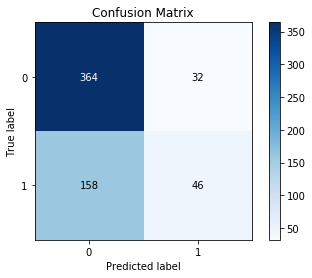

In [20]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred3)

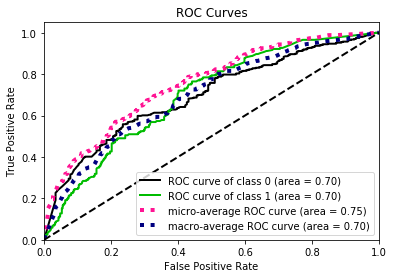

In [22]:
skplt.metrics.plot_roc(y_test, y_pred_prob_3)

C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


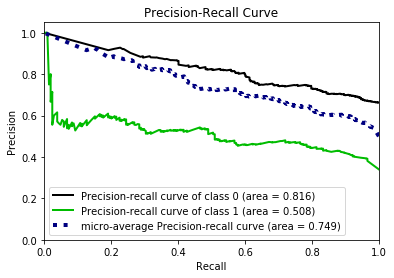

In [24]:
skplt.metrics.plot_precision_recall_curve(y_test, y_pred_prob_3)

In [25]:
mod4 = lgb.LGBMClassifier(random_state = 123)

In [26]:
param_grid4 = {'max_depth': [15, 20, 25, 30],
               'num_leaves': [10, 20, 30],
              'learning_rate': [0.01, 0.1, 0.5],
              'n_estimator': [100, 200,300,400,500]}

In [27]:
grid4 = GridSearchCV(estimator = mod4,
                    param_grid = param_grid4,
                    scoring = 'roc_auc',
                    cv = 3,
                    n_jobs = -1,
                    verbose = 1)

In [28]:
grid4.fit(X_train, y_train,
         feature_name = ['term', 'grade', 'home_ownership', 'verification_status',
       'purpose', 'application_type', 'loan_amnt', 'int_rate',
       'annual_inc', 'dti', 'Emp_Length_Years', 'Earliest_Cr_Line_Yr'],
         categorical_feature = ['term', 'grade', 'home_ownership', 'verification_status',
       'purpose', 'application_type'])

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.1min finished
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is ['application_type', 'grade', 'home_ownership', 'purpose', 'term', 'verification_status']
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))


GridSearchCV(cv=3, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=123,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [15, 20, 25, 30], 'num_leaves': [10, 20, 30], 'learning_rate': [0.01, 0.1, 0.5], 'n_estimator': [100, 200, 300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [29]:
classifier4 = lgb.LGBMClassifier(random_state = 123,
                                max_depth = grid3.best_params_['max_depth'],
                                 num_leaves = grid3.best_params_['num_leaves'],
                                learning_rate = grid3.best_params_['learning_rate'],
                                n_estimator = grid3.best_params_['n_estimator'])

In [30]:
classifier4.fit(X_train, y_train,
               feature_name = ['term', 'grade', 'home_ownership', 'verification_status',
       'purpose', 'application_type', 'loan_amnt', 'int_rate',
       'annual_inc', 'dti', 'Emp_Length_Years', 'Earliest_Cr_Line_Yr'],
         categorical_feature = ['term', 'grade', 'home_ownership', 'verification_status',
       'purpose', 'application_type'])

C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is ['application_type', 'grade', 'home_ownership', 'purpose', 'term', 'verification_status']
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.01, max_depth=15, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimator=100,
        n_estimators=100, n_jobs=-1, num_leaves=10, objective=None,
        random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=1)

In [31]:
y_pred4 = classifier4.predict(X_test)

y_pred_prob_4 = classifier4.predict_proba(X_test)

C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

import scikitplot as skplt

C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


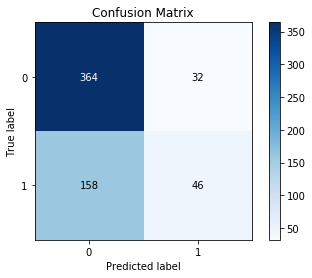

In [33]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred4)

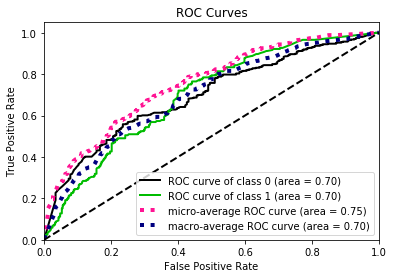

In [34]:
skplt.metrics.plot_roc(y_test, y_pred_prob_4)

C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


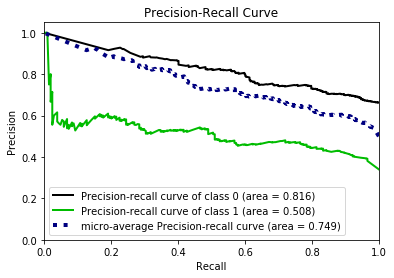

In [35]:
skplt.metrics.plot_precision_recall_curve(y_test, y_pred_prob_4)

In [36]:
# add more hyperparameters

In [37]:
mod5 = lgb.LGBMClassifier(random_state = 123)

In [38]:
param_grid5 = {'max_depth': [15, 20, 25, 30],
               'num_leaves': [10, 20, 30],
              'learning_rate': [0.01, 0.1, 0.5],
              'n_estimator': [100, 200,300,400,500],
              'reg_alpha': [0.1, 0.4, 0.5, 0.6],
              'reg_lambda': [0.1, 0.4, 0.5, 0.6]}

In [39]:
grid5 = GridSearchCV(estimator = mod5,
                    param_grid = param_grid5,
                    scoring = 'roc_auc',
                    cv = 5,
                    n_jobs = -1,
                    verbose = 1)

In [40]:
grid5.fit(X_train, y_train,
         categorical_feature = [0,1,2,3,4,5])

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 11242 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 12792 tasks      | elapsed: 22

GridSearchCV(cv=5, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=123,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [15, 20, 25, 30], 'num_leaves': [10, 20, 30], 'learning_rate': [0.01, 0.1, 0.5], 'n_estimator': [100, 200, 300, 400, 500], 'reg_alpha': [0.1, 0.4, 0.5, 0.6], 'reg_lambda': [0.1, 0.4, 0.5, 0.6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [41]:
classifier5 = lgb.LGBMClassifier(random_state = 123,
                                max_depth = grid5.best_params_['max_depth'],
                                 num_leaves = grid5.best_params_['num_leaves'],
                                learning_rate = grid5.best_params_['learning_rate'],
                                n_estimator = grid5.best_params_['n_estimator'],
                                reg_alpha = grid5.best_params_['reg_alpha'],
                                reg_lambda = grid5.best_params_['reg_lambda'])

In [42]:
classifier5.fit(X_train, y_train,
               categorical_feature = [0,1,2,3,4,5])

C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is [0, 1, 2, 3, 4, 5]
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.01, max_depth=15, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimator=100,
        n_estimators=100, n_jobs=-1, num_leaves=10, objective=None,
        random_state=123, reg_alpha=0.5, reg_lambda=0.4, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=1)

In [43]:
y_pred5 = classifier5.predict(X_test)

y_pred_prob_5 = classifier5.predict_proba(X_test)

C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

import scikitplot as skplt

C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


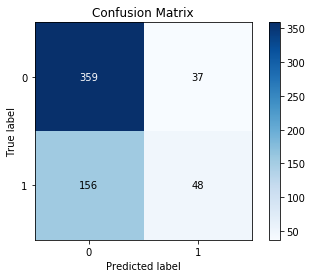

In [45]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred5)

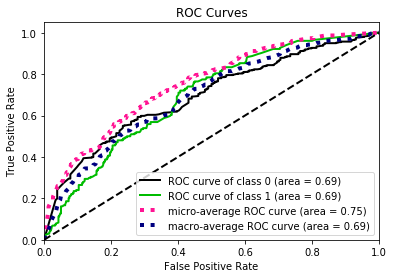

In [46]:
skplt.metrics.plot_roc(y_test, y_pred_prob_5)

C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


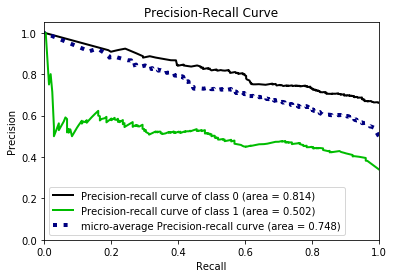

In [47]:
skplt.metrics.plot_precision_recall_curve(y_test, y_pred_prob_5)

In [48]:
feature_imp = pd.DataFrame(data = classifier5.feature_importances_, index = X_test.columns.values, columns = ['values'])
feature_imp.sort_values(['values'], ascending = False, inplace = True)
feature_imp.reset_index(level = 0, inplace = True)

feature_imp

,index,values
0,int_rate,371
1,annual_inc,184
2,dti,89
3,Emp_Length_Years,83
4,Earliest_Cr_Line_Yr,47
5,loan_amnt,46
6,home_ownership,37
7,term,25
8,verification_status,18
9,grade,0


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5,1,'Variable Importance Plot of LightGBM')

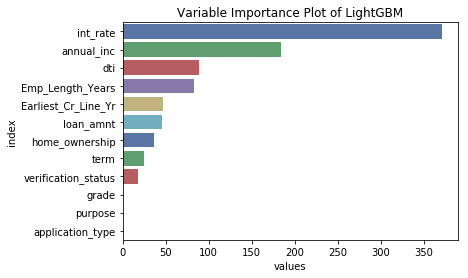

In [50]:
ax = sns.barplot(x = 'values', y = 'index', data = feature_imp, palette = 'deep')
ax.set_title('Variable Importance Plot of LightGBM')

In [51]:
# compare with LightGBM model without categorical varibales

In [52]:
mod6 = lgb.LGBMClassifier(random_state = 123)

In [53]:
param_grid6 = {
    'max_depth': [15, 20, 25, 30],
               'num_leaves': [10, 20, 30],
              'learning_rate': [0.01, 0.1, 0.5],
              'n_estimator': [100, 200,300,400,500],
              'reg_alpha': [0.1, 0.4, 0.5, 0.6],
              'reg_lambda': [0.1, 0.4, 0.5, 0.6]
}

In [54]:
grid6 = GridSearchCV(estimator = mod6,
                    param_grid = param_grid6,
                    scoring = 'roc_auc',
                    cv = 5,
                    n_jobs = -1,
                    verbose = 1)

In [55]:
grid6.fit(X_train, y_train)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 11242 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 12792 tasks      | elapsed: 21

GridSearchCV(cv=5, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=123,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [15, 20, 25, 30], 'num_leaves': [10, 20, 30], 'learning_rate': [0.01, 0.1, 0.5], 'n_estimator': [100, 200, 300, 400, 500], 'reg_alpha': [0.1, 0.4, 0.5, 0.6], 'reg_lambda': [0.1, 0.4, 0.5, 0.6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [57]:
classifier6 = lgb.LGBMClassifier(random_state = 123,
                                max_depth = grid6.best_params_['max_depth'],
                                 num_leaves = grid6.best_params_['num_leaves'],
                                learning_rate = grid6.best_params_['learning_rate'],
                                n_estimator = grid6.best_params_['n_estimator'],
                                reg_alpha = grid6.best_params_['reg_alpha'],
                                reg_lambda = grid6.best_params_['reg_lambda'])

In [58]:
classifier6.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.01, max_depth=15, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimator=100,
        n_estimators=100, n_jobs=-1, num_leaves=10, objective=None,
        random_state=123, reg_alpha=0.1, reg_lambda=0.6, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=1)

In [59]:
y_pred6 = classifier6.predict(X_test)

y_pred_prob6 = classifier6.predict_proba(X_test)

C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

import scikitplot as skplt

C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


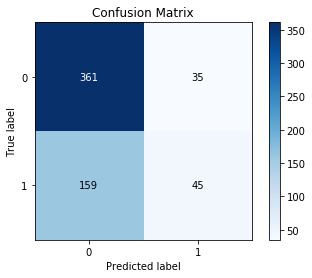

In [63]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred6)

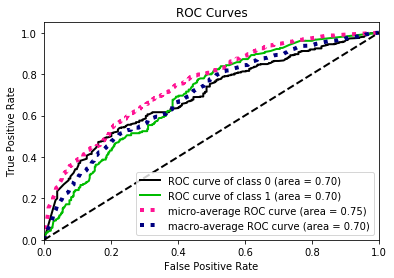

In [65]:
skplt.metrics.plot_roc(y_test, y_pred_prob6)

C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


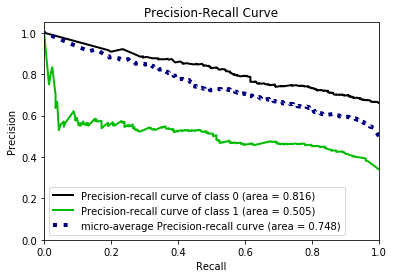

In [66]:
skplt.metrics.plot_precision_recall_curve(y_test, y_pred_prob6)

In [68]:
feature_imp = pd.DataFrame(data = classifier6.feature_importances_, index = X_test.columns.values, columns = ['values'])
feature_imp.sort_values(['values'], ascending = False, inplace = True)
feature_imp.reset_index(level = 0, inplace = True)

feature_imp

,index,values
0,int_rate,387
1,annual_inc,172
2,dti,85
3,Emp_Length_Years,80
4,grade,63
5,loan_amnt,43
6,Earliest_Cr_Line_Yr,36
7,home_ownership,28
8,verification_status,5
9,term,1


Text(0.5,1,'Variable Importance Plot of LightGBM')

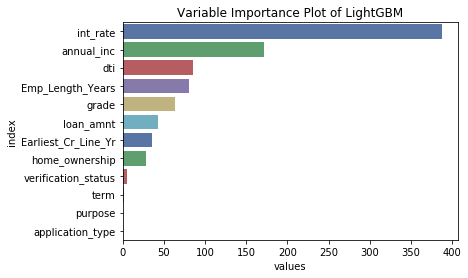

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ax = sns.barplot(x = 'values', y = 'index', data = feature_imp, palette = 'deep')
ax.set_title('Variable Importance Plot of LightGBM')